In [ ]:
# !pip install hvplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas  as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Life Expectancy Data.csv')

dataset:


*   Life Expectancy in age
*   Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

*   Number of Infant Deaths per 1000 population
*   Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
*   Expenditure on health as a percentage of Gross Domestic Product per capita(%)
*  Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
*  Measles - number of reported cases per 1000 population









In [ ]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
#total countries information
len(data['Country'].unique())

193

In [ ]:
data['Country'].value_counts().sort_values()

Dominica             1
Tuvalu               1
Cook Islands         1
Marshall Islands     1
Monaco               1
                    ..
Zambia              16
Timor-Leste         16
Thailand            16
Burundi             16
Côte d'Ivoire       16
Name: Country, Length: 193, dtype: int64

In [ ]:
#overview of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

All the columns are numerical except country

In [ ]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
#quantifying the null values
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
#dropping the null values
data.dropna(inplace=True)

In [ ]:
#total number of columns
len(data.columns)

22

## Life expectancy Analysis countrywise

In [ ]:
fig=px.histogram(data,x='Life expectancy ',color='Status',template='plotly')
fig.show()

life expectancy is hight for developed countries

In [ ]:
data=data.groupby('Country').filter(lambda x : len(x)>10)


In [ ]:
#dropping the country column
data = data.drop(['Country','Year'],axis=1)

In [ ]:
y= data['Life expectancy ']

When selecting features for a model, it is important to address the issue of overfitting in linear regression caused by highly correlated input variables. To mitigate this, one approach is to calculate the correlations between pairs of input variables and eliminate the most highly correlated ones.

For numerical input and numerical output:

Pearson's correlation coefficient measures linear correlation.
Spearman's rank coefficient measures nonlinear correlation.

**Pearson's correlation coefficient: **
In statistics, the Pearson correlation coefficient is a statistical metric used to quantify the linear relationship between two datasets. It is calculated as the ratio of the covariance of the variables to the product of their standard deviations. This normalization ensures that the resulting coefficient always falls within the range of -1 to 1. Similar to covariance, the Pearson correlation coefficient only captures linear relationships and does not account for other types of relationships or correlations. For instance, in a simple example, the age and height of a group of teenagers in a high school would be expected to have a Pearson correlation coefficient that is significantly greater than 0 but less than 1, as a perfect correlation of 1 would be unrealistically ideal.

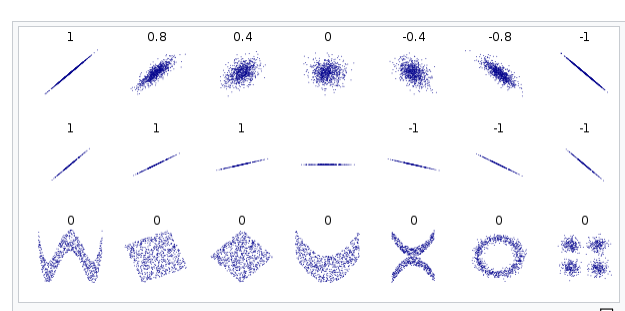

In [ ]:
# calculating Pearson's correlation coefficient using pandas
p_corr = data.corr()

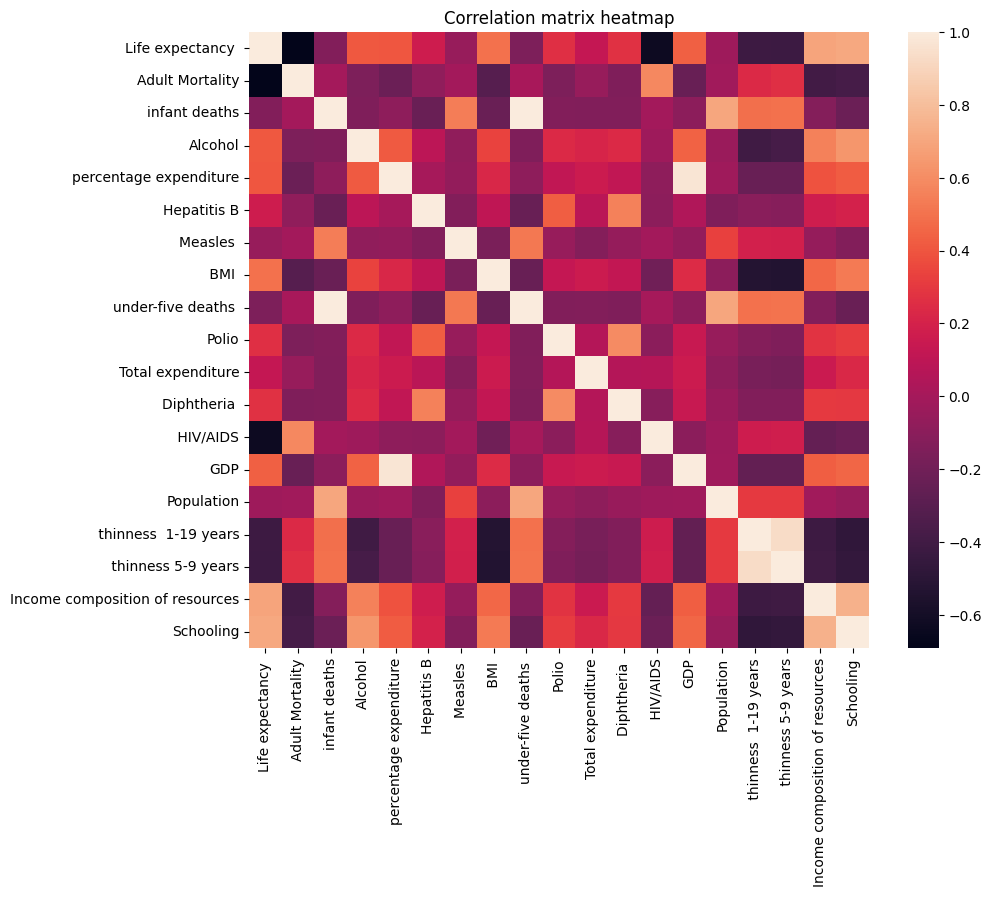

In [ ]:
#displating the correlation matrix using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(p_corr)
plt.title('Correlation matrix heatmap')
plt.show()

In [ ]:


label_encoder = LabelEncoder()


data['Status']= label_encoder.fit_transform(data['Status'])

data['Status'].unique()

array([1, 0])

In [ ]:


upper = p_corr.where(np.triu(np.ones(p_corr.shape), k=1).astype(bool))

In [ ]:

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]


data.drop(to_drop, axis=1, inplace=True)

In [ ]:

len(data.columns)

17

# Data preparation for regression model

In [ ]:
X = data
y = y


In [ ]:
# train the data and split it accordingly
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
print('length of training samples',len(X_train))
print('length of testing samples',len(X_test))

length of training samples 1128
length of testing samples 282


Scaling the data


In [ ]:
 scaling = StandardScaler()
 #transforming the training data
 X_train = scaling.fit_transform(X_train)
 #transforming the test data
 X_test = scaling.transform(X_test)

Linear regression model

In [ ]:
linear_regression = LinearRegression()


In [ ]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions = linear_regression.predict(X_test)

Model evaluation

In [ ]:
print(mean_absolute_error(predictions,y_test))

2.6154019848190922e-14


In [ ]:
print(linear_regression.intercept_)

70.21985815602837


Interpreting Linear Regression Coefficients

In [ ]:
coeff_df = pd.DataFrame(linear_regression.coef_, X.columns, columns=['Coefficient'])
coeff_df['Coefficient']= coeff_df['Coefficient'].astype('float32')
coeff_df

,Coefficient
Status,4.569313e-15
Life expectancy,8.439037e+00
Adult Mortality,2.857826e-15
infant deaths,3.839694e-15
Alcohol,-8.581681e-15
percentage expenditure,-2.107266e-15
Hepatitis B,-5.069020e-15
Measles,2.308503e-15
BMI,-5.323855e-15
Polio,-3.285201e-15


Interpreting the coefficients



> Holding all other variables fixed, One unit shift in



Linear Regression

In [ ]:

def cross_val(model):
  # """this model takes the parameters as a regression model and returns validation score"""
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def reg_metrics(true, predicted):
    #This function requires input parameters, including actual values and model predictions.
    #It calculates and returns the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) values.

    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def reg_errors(true, predicted):

    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

test_pred = linear_regression.predict(X_test)
train_pred = linear_regression.predict(X_train)

print('Test set evaluation:\n_____________________________________')
reg_metrics(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
reg_metrics(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *reg_errors(y_test, test_pred) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 2.6154019848190922e-14
MSE: 1.1977258339696043e-27
RMSE: 3.460817582551274e-14
R2 Square 1.0
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.043743350348231e-14
MSE: 1.4980524537728945e-27
RMSE: 3.8704682581993806e-14
R2 Square 1.0
__________________________________


Ridge Regression

In [ ]:


model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
reg_metrics(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
reg_metrics(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *reg_errors(y_test, test_pred) , cross_val(Ridge())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df,results_df_2])
results_df

Test set evaluation:
_____________________________________
MAE: 0.7819010086838101
MSE: 0.9725775814672714
RMSE: 0.9861934807466897
R2 Square 0.9833869686192347
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.8483950885604604
MSE: 1.1706848266944148
RMSE: 1.0819818975816622
R2 Square 0.9835618039297372
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,2.615402e-14,1.197726e-27,3.460818e-14,1.000000,1.0
0,Ridge Regression,7.819010e-01,9.725776e-01,9.861935e-01,0.983387,1.0


Lasso regression

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1,
              precompute=True,
#               warm_start=True,
              positive=True,
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
reg_metrics(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
reg_metrics(y_train, train_pred)

results_df_3 = pd.DataFrame(data=[["Lasso Regression", *reg_errors(y_test, test_pred) , cross_val(Lasso())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df,results_df_3])

Test set evaluation:
_____________________________________
MAE: 0.07005227004925037
MSE: 0.008229412617276898
RMSE: 0.0907161100206402
R2 Square 0.999859429733256
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.07774013137387653
MSE: 0.0099999999999993
RMSE: 0.0999999999999965
R2 Square 0.9998595847857986
__________________________________


In [ ]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,2.615402e-14,1.197726e-27,3.460818e-14,1.000000,1.000000
0,Ridge Regression,7.819010e-01,9.725776e-01,9.861935e-01,0.983387,1.000000
0,Lasso Regression,7.005227e-02,8.229413e-03,9.071611e-02,0.999859,0.999445


In [ ]:
def plotGraph(y_test,y_pred):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title('Actual vs test predictions')
    plt.show()
    return

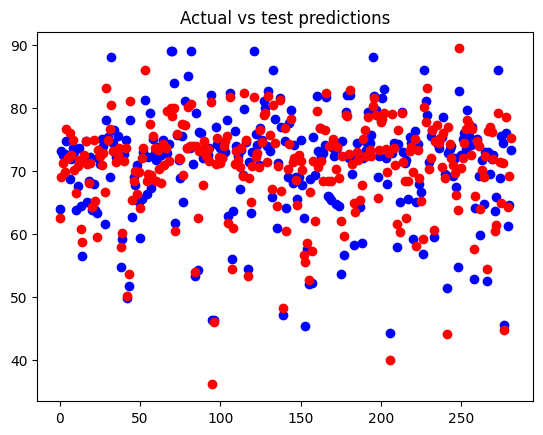

In [108]:
plotGraph(y_test,test_pred)

## SelectKBest feature selection


In [ ]:
select = SelectKBest(score_func=f_classif, k=10)
z = select.fit_transform(X_train,y_train)

print("After selecting best 3 features:", z.shape)



After selecting best 3 features: (1128, 10)


In [ ]:
filter = select.get_support()
features = X.columns

print("All features:")
print(features)

print("Selected best 3:")
print(features[filter])

All features:
Index(['Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'Population',
       ' thinness  1-19 years', 'Income composition of resources',
       'Schooling'],
      dtype='object')
Selected best 3:
Index(['Status', 'Life expectancy ', 'Adult Mortality', 'Alcohol',
       'percentage expenditure', ' BMI ', ' HIV/AIDS', ' thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [ ]:
select_df = data[['Status', 'Adult Mortality', 'Alcohol', 'percentage expenditure',
       ' BMI ', 'Total expenditure', ' HIV/AIDS', ' thinness  1-19 years',
       'Income composition of resources', 'Schooling']]

In [109]:
select_df

,Status,Adult Mortality,Alcohol,percentage expenditure,BMI,Total expenditure,HIV/AIDS,thinness 1-19 years,Income composition of resources,Schooling
0,1,263.0,0.01,71.279624,19.1,8.16,0.1,17.2,0.479,10.1
1,1,271.0,0.01,73.523582,18.6,8.18,0.1,17.5,0.476,10.0
2,1,268.0,0.01,73.219243,18.1,8.13,0.1,17.7,0.470,9.9
3,1,272.0,0.01,78.184215,17.6,8.52,0.1,17.9,0.463,9.8
4,1,275.0,0.01,7.097109,17.2,7.87,0.1,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...
2933,1,723.0,4.36,0.000000,27.1,7.13,33.6,9.4,0.407,9.2
2934,1,715.0,4.06,0.000000,26.7,6.52,36.7,9.8,0.418,9.5
2935,1,73.0,4.43,0.000000,26.3,6.53,39.8,1.2,0.427,10.0
2936,1,686.0,1.72,0.000000,25.9,6.16,42.1,1.6,0.427,9.8


In [ ]:
#features and targets
X_select = select_df
y_select = y


In [ ]:
# train and test split
X_train,X_test,y_train,y_test = train_test_split(X_select,y_select,test_size=0.2)

In [ ]:
 scaling = StandardScaler()
 #transforming the training data
 X_train = scaling.fit_transform(X_train)
 #transforming the test data
 X_test = scaling.transform(X_test)

Linear regression

In [111]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
predictions_lr = linear_regression.predict(X_test)

In [110]:
test_pred = linear_regression.predict(X_test)
train_pred = linear_regression.predict(X_train)

print('Test set evaluation:\n_____________________________________')
reg_metrics(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
reg_metrics(y_train, train_pred)

results_df_select = pd.DataFrame(data=[["Linear Regression", *reg_errors(y_test, test_pred) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 2.7825820726451798
MSE: 13.46646471722021
RMSE: 3.6696682026063625
R2 Square 0.8051902922841916
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.6810411708856914
MSE: 11.701807333349437
RMSE: 3.4207904544636225
R2 Square 0.8289885669484396
__________________________________


Ridge regression

In [ ]:

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
reg_metrics(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
reg_metrics(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *reg_errors(y_test, test_pred) , cross_val(Ridge())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df_select = pd.concat([results_df_select,results_df_2])


Test set evaluation:
_____________________________________
MAE: 2.667919853478855
MSE: 11.192380039747777
RMSE: 3.345501463121452
R2 Square 0.8489116693840103
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.7611291694459226
MSE: 12.426363194491822
RMSE: 3.5251047068834453
R2 Square 0.8149996465101059
__________________________________


Lasso regression

In [ ]:


model = Lasso(alpha=0.1,
              precompute=True,
#               warm_start=True,
              positive=True,
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
reg_metrics(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
reg_metrics(y_train, train_pred)

results_df_3 = pd.DataFrame(data=[["Lasso Regression", *reg_errors(y_test, test_pred) , cross_val(Lasso())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df_select = pd.concat([results_df_select,results_df_3])

Test set evaluation:
_____________________________________
MAE: 3.9713006073934336
MSE: 30.55542778101693
RMSE: 5.5276964262717
R2 Square 0.5875257489205739
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.9485163504689016
MSE: 28.57357362617452
RMSE: 5.345425485980936
R2 Square 0.5746043199787565
__________________________________


In [113]:
results_df_select

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,2.782582,13.466465,3.669668,0.80519,1.0
